Import libraries

In [3]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [4]:
df = pd.read_csv('data/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
print(df.date)
print(type(df.date.iloc[0]))

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object
<class 'str'>


In [7]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df

df['sales_year'] = df.date.apply(lambda x: int(x[:4]))
df['sales_month'] = df.date.apply(lambda x: int(x[4:6]))

In [8]:
df.groupby('sales_month')

In [9]:
print(df.groupby('sales_month')['id'].count())
print(df.groupby('sales_year')['id'].count())

sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64
sales_year
2014    14633
2015     6980
Name: id, dtype: int64


In [ ]:
# your code here
most_sales_month = max(df['sales_month'])
print(most_sales_month)
# uncomment below and update the value as an integer
most_sales_month = 12

In [ ]:
# your code here
min_sales_month = min(df['sales_month'])
print(min_sales_month)
# uncomment below and update the value as an integer
least_sales_month = 1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
print(df.price)
print(type(df.price.iloc[0]))

print(df.bathrooms)
print(type(df.bathrooms.iloc[0]))

print(df.waterfront)
print(type(df.waterfront.iloc[0]))

print(df.grade)
print(type(df.grade.iloc[0]))

print(df.zipcode)
print(type(df.zipcode.iloc[0]))

print(df.sales_year)
print(type(df.sales_year.iloc[0]))

# uncomment the feaures below and update the strings with 'numeric' or 'categorical'
price = 'numeric'
bathrooms = 'numeric'
waterfront = 'categorical'
grade = 'numeric'
zipcode = 'categorical'
sales_year = 'categorical'

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64
<class 'numpy.float64'>
0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64
<class 'numpy.float64'>
0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: waterfront, Length: 21613, dtype: int64
<class 'numpy.int64'>
0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: int64
<class 'numpy.int64'>
0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21

In [12]:
# You can use below to check what unique values exist in each column.
for c in df.columns[2:]:
    print(c, df[c].unique())


price [ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
sqft_living [1180 2570  770 ... 3087 3118 1425]
sqft_lot [ 5650  7242 10000 ...  5813  2388  1076]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 

In [13]:
# test 1/6 for 1b 
# This test is an example. The rest tests are hidden but are the same as this one checking each answer.
assert price == 'numeric', "Check 1b. What is the correct variable type for price?"

In [14]:
# drop unnecessary features, replace df
df=df.drop(['id', 'date', 'zipcode'], axis=1)

In [15]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248,-0.030387,0.008376


In [16]:
# your code here
corr_matrix = df.corr()
target_corr = corr_matrix['price']
best_predictor = target_corr.drop('price').abs().sort_values(ascending=False).idxmax()
print(best_predictor)
# uncomment and update best_guess_predictor with a string value
best_guess_predictor = 'sqft_living'

sqft_living


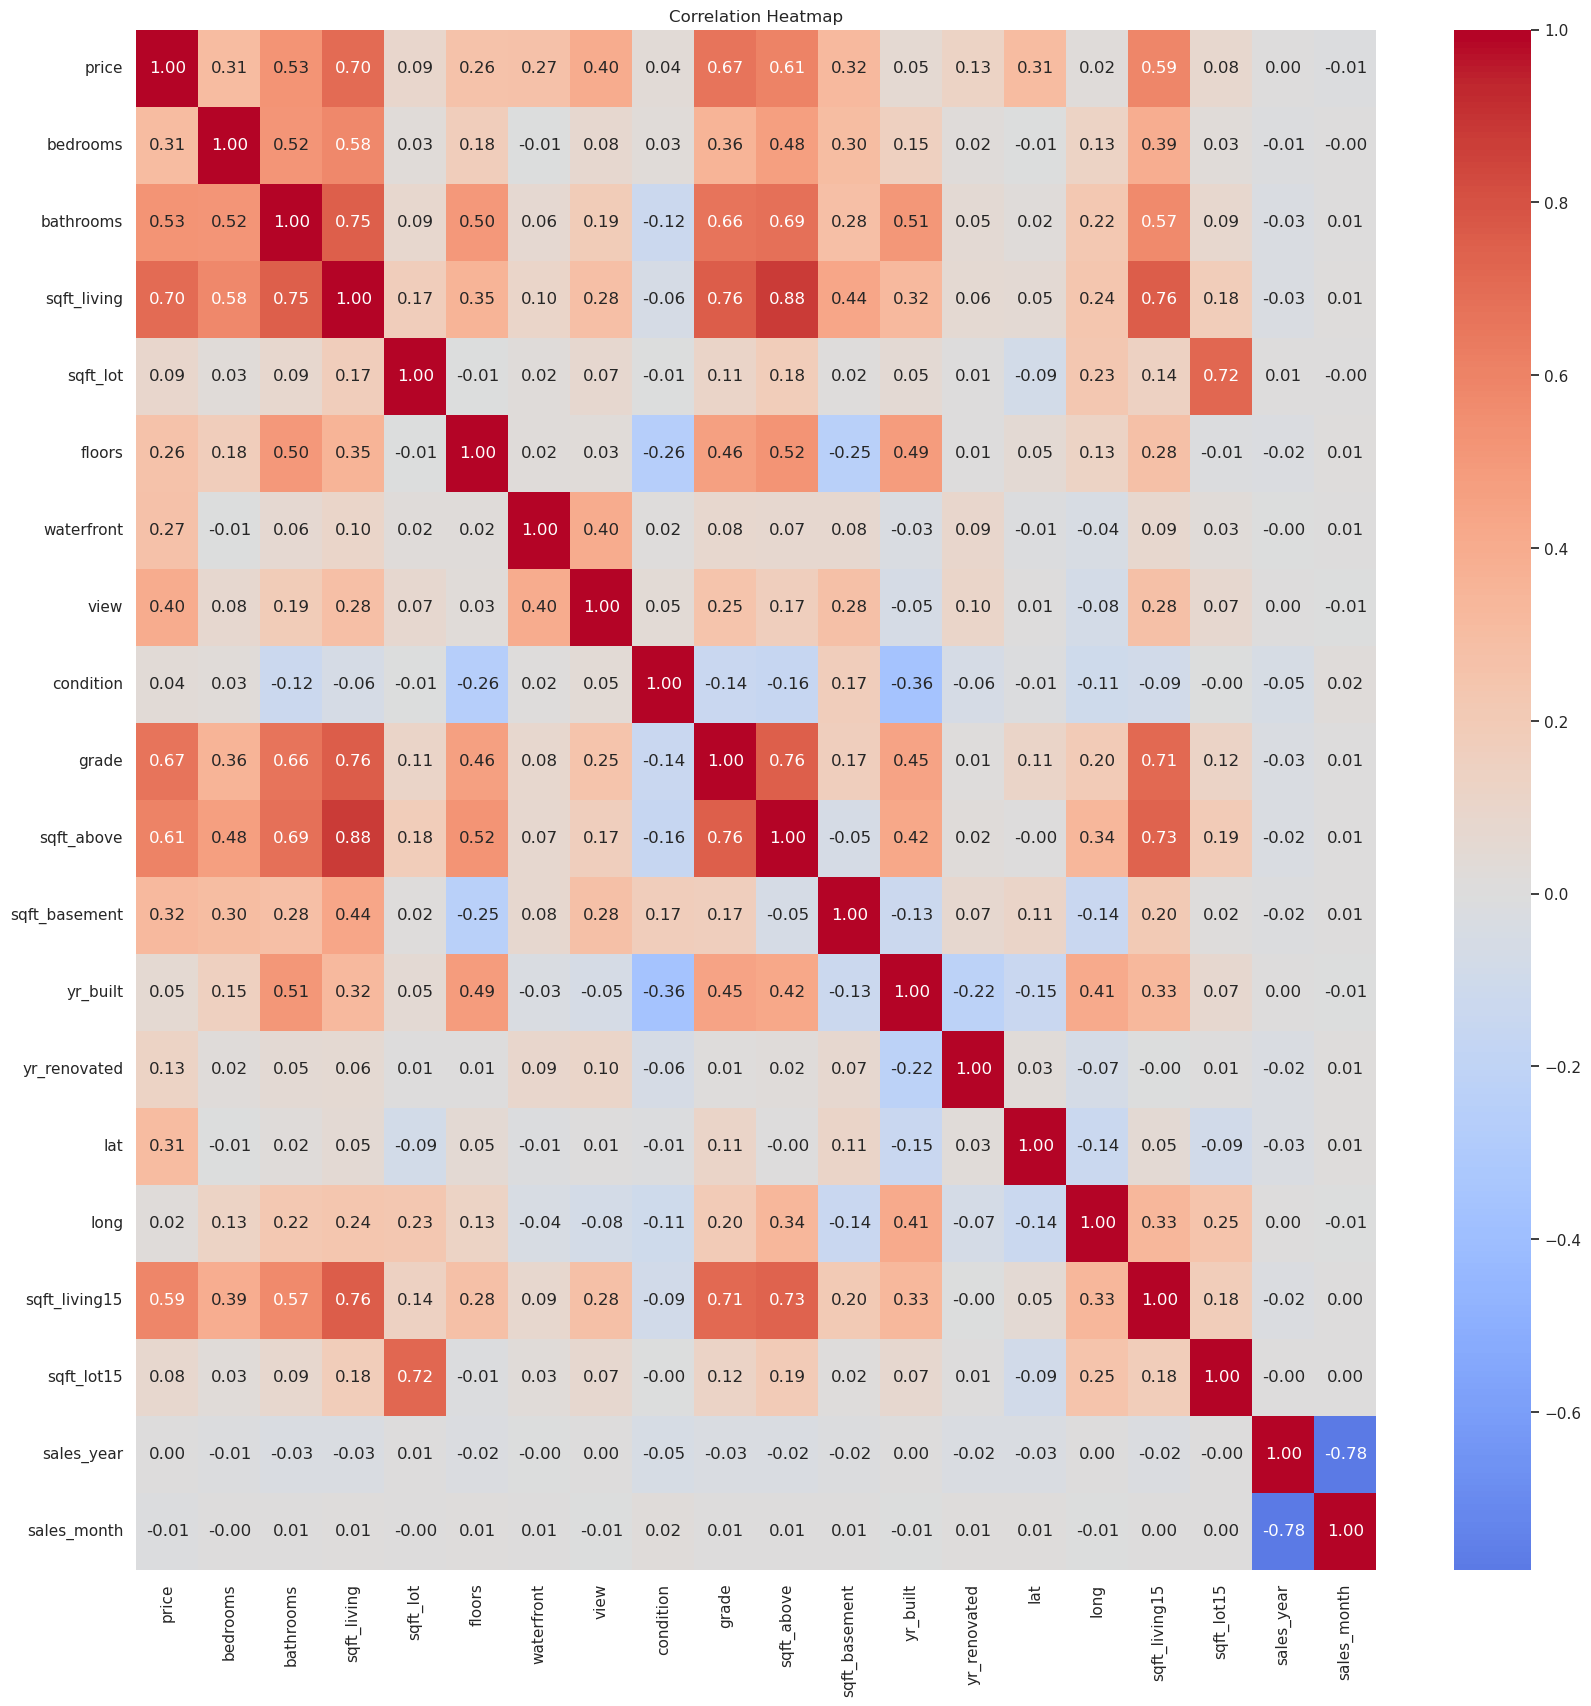

In [29]:
# practice visualizing correlation matrix using a heatmap
# your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(20, 20))  # optional: adjust size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'pairplot' is not defined

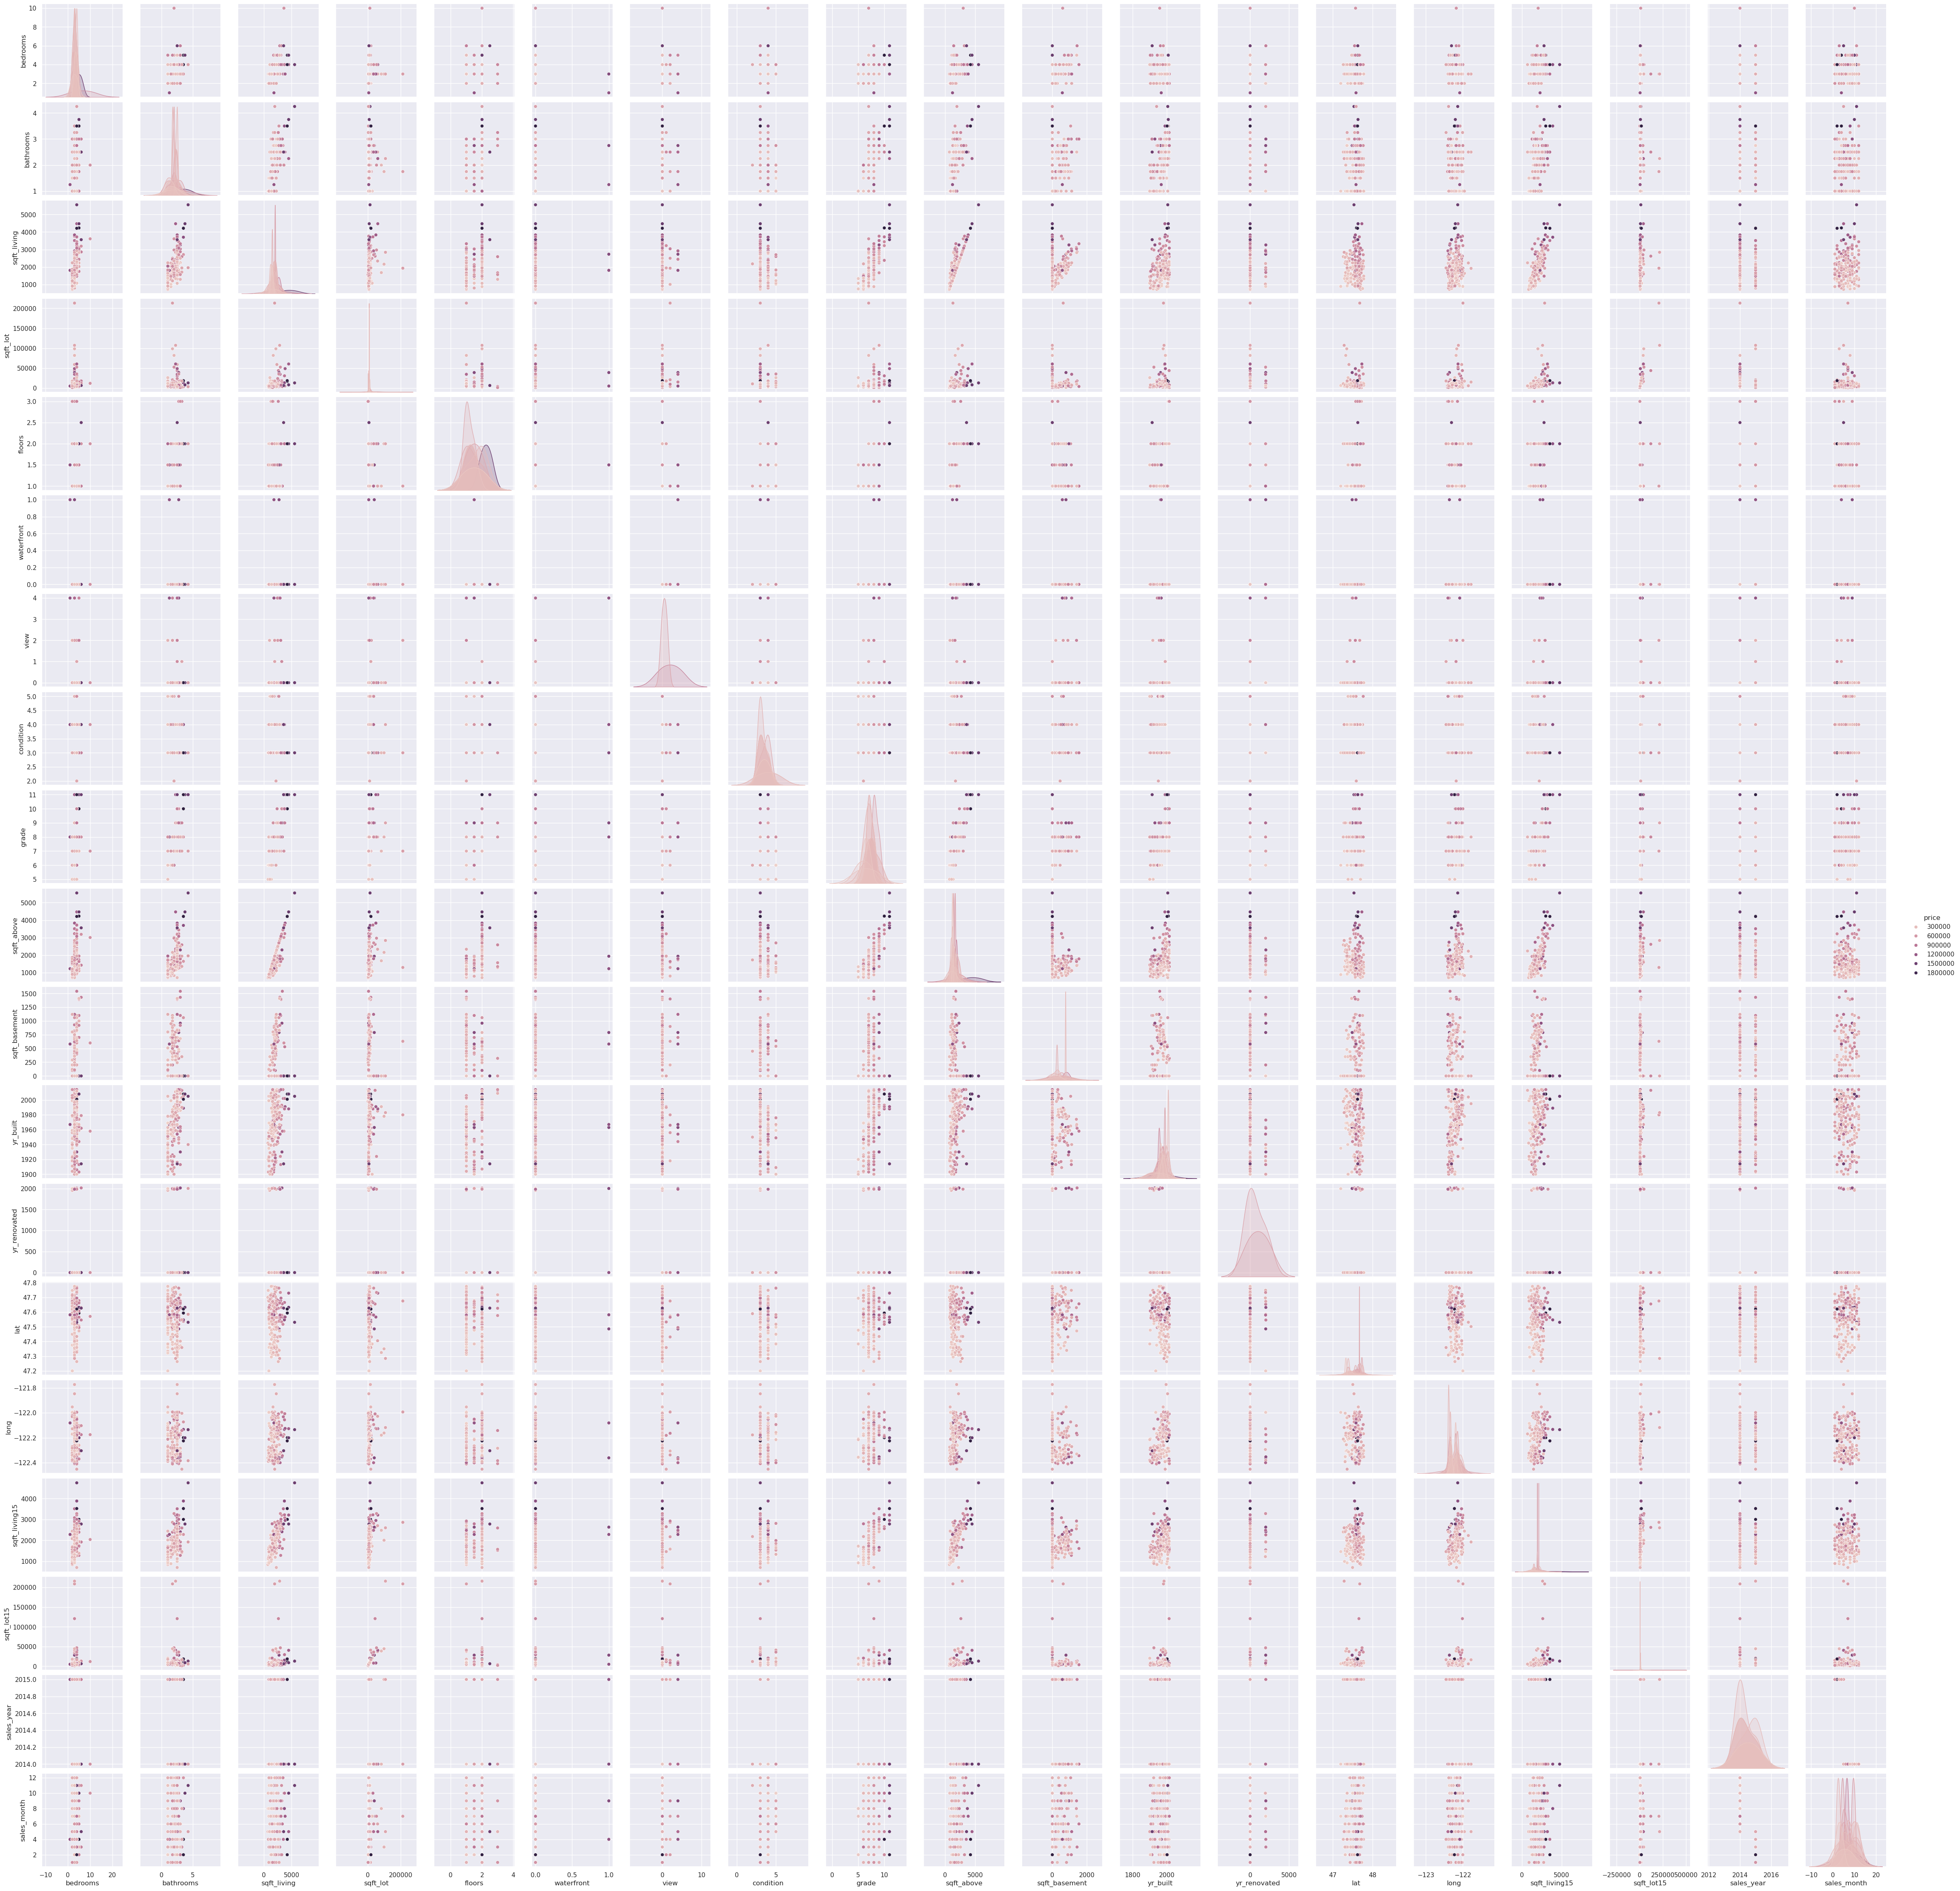

In [ ]:
# practice inspecting relationships between features using a pair plot. 
# your code here
import seaborn as sns
import matplotlib.pyplot as plt


pairplot = sns.pairplot(df.sample(200), hue='price')

# Adjust axis label sizes
pairplot.fig.subplots_adjust(top=0.95)  # optional: give space for title
pairplot.fig.suptitle('Pairplot of Sampled Data', fontsize=20)  # optional title

for ax in pairplot.axes.flatten():
    # x and y axis labels
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # tick labels
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

plt.show()


3. Simple linear regression [20 pts]
3a) Data preparation [5 pts]
We will split the data to train and test datasets such that the test dataset is 20% of original data. Use sklearn.model_selection.train_test_split function to split the data frame to X_train and X_test. X_train is 80% of observation randomly chosen. X_test is the rest 20%. Both X_train and X_test are pd.DataFrame object and include 'price' in the table. Note that the train_test_split can handle data frame as well as array.

💡Tip: Use sklearn.model_selecttion.train_test_split to split the data frame. We would like X_train to be 80% of the observation and X_test to be 20% of the observations. Print length of X_train and X_test.

In [21]:
from sklearn.model_selection import train_test_split

# your code here
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

print("Number of rows in X_train:", len(X_train))
print("Number of rows in X_test:", len(X_test))


Number of rows in X_train: 17290
Number of rows in X_test: 4323


3b) Train a simple linear regression model [5 pts]
Use the best_guess_predictor as a single predictor and build a simple linear regression model using statsmodels.formula.api.ols function (https://www.statsmodels.org/dev/example_formulas.html) Print out the result summary. Train on the X_train portion. What is the adjusted R-squared value?

💡Tip: We had imported the library at the top of this notebook. So you can use the smf alias.

import statsmodels.formula.api as smf
N.B.: It recommended that you use the statsmodel library to do the regression analysis as opposed to e.g. sklearn. The sklearn library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

In [22]:
# use best_guess_predictor as a single predictor
# build a simple linear regression model, train on the X_train portion

# Make sure to use the `statsmodels.formula.api.ols` function for building the model. 
# model = 

#update following value according to the result
# adj_R2 =  

# your code here

import statsmodels.formula.api as smf

best_guess_predictor = 'sqft_living'
formula = f'price ~ {best_guess_predictor}'


model = smf.ols(formula=formula, data=X_train).fit()


print(model.summary())


adj_R2 = model.rsquared_adj
print("Adjusted R-squared:", adj_R2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:07:10   Log-Likelihood:            -2.3995e+05
No. Observations:               17290   AIC:                         4.799e+05
Df Residuals:                   17288   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -4.2e+04   4886.778     -8.594      

In [23]:
# self test
assert len(model.params.index) == 2, 'Check 3b, Number of model parameters (including intercept) does not match. Did you make a univariate model?'

3c) Best predictor [10 pts]
In question 5a, we picked a best guess predictor for price based on the correlation matrix. Now we will consider whether the best_guess_predictor that we used is still the best.
Print out a list ranking all of the predictors. Then print out a list of the top three predictors in order.

Hint: Linear regression uses adjusted R squared as fit performance. So you can rank by this metric.

What were your top three predictors?
How did you order your list of predictors to select those as the top ones?
Is your top predictor for this section the same as the best guess predictor you selected in question 2a?

In [28]:
import statsmodels.formula.api as smf


predictors = [col for col in df.columns if col != 'price']

adj_r2_dict = {}

for predictor in predictors:
    formula = f'price ~ {predictor}'
    model = smf.ols(formula=formula, data=X_train).fit()
    adj_r2_dict[predictor] = model.rsquared_adj

ranked_predictors = sorted(adj_r2_dict.items(), key=lambda x: x[1], reverse=True)

top_3 = ranked_predictors[:3]

for name, value in top_3:
    print(name)


sqft_living
grade
sqft_above
